## Clustering Homberger and Solomon instances with regards to their extracted features

### Solomon Instance Clustering

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv('solomon_features.csv')
df.head()

,instance,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,average_distance_to_centroid,cv_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,...,tw_ratio_avg_overlaps_to_total,tw_ratio_avg_window_length_to_longest,tw_ratio_cv_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,R106.txt,100.0,0.0156,0.2444,0.3725,0.2441,0.3709,0.0729,0.3027,4.0,...,0.34,0.35,0.49,2,0.24,0.39,0.0417,0.0177,0.0360,0.0471
1,R208.txt,100.0,0.0156,0.2444,0.3725,0.2441,0.3709,0.0146,0.0605,4.0,...,0.80,0.80,0.04,2,0.24,0.39,0.0417,0.0177,0.0360,0.0471
2,C207.txt,100.0,0.0243,0.2331,0.3041,0.2324,0.3004,0.0259,0.0818,4.0,...,0.19,0.49,0.04,3,0.16,0.20,0.0625,0.0068,0.0425,0.0533
3,RC206.txt,100.0,0.0436,0.2596,0.3019,0.2565,0.3009,0.0172,0.0544,4.0,...,0.25,1.00,0.00,2,0.30,0.18,0.0333,0.0086,0.0299,0.0324
4,R110.txt,100.0,0.0156,0.2444,0.3725,0.2441,0.3709,0.0729,0.3027,4.0,...,0.41,0.49,0.26,2,0.24,0.39,0.0417,0.0177,0.0360,0.0471


In [3]:
#Normalizamos la data para facilitar el clustering de kmeans
scaler = MinMaxScaler(feature_range=(0, 1))
df_no_instance = df.drop(["instance"],axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_instance), columns=df_no_instance.columns)
df_scaled.head()

,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,average_distance_to_centroid,cv_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,avg_NN_distances,...,tw_ratio_avg_overlaps_to_total,tw_ratio_avg_window_length_to_longest,tw_ratio_cv_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,0.0,0.000000,0.542169,1.000000,0.582492,1.000000,0.768116,1.000000,0.0,1.000000,...,0.386667,0.097222,0.710145,0.000000,0.7,1.000000,0.125937,1.000000,0.484127,0.242574
1,0.0,0.000000,0.542169,1.000000,0.582492,1.000000,0.000000,0.024567,0.0,1.000000,...,1.000000,0.722222,0.057971,0.000000,0.7,1.000000,0.125937,1.000000,0.484127,0.242574
2,0.0,0.310714,0.201807,0.031161,0.188552,0.000000,0.148880,0.110350,0.0,0.379538,...,0.186667,0.291667,0.057971,0.333333,0.3,0.512821,0.437781,0.322981,1.000000,0.344884
3,0.0,1.000000,1.000000,0.000000,1.000000,0.007092,0.034256,0.000000,0.0,0.511551,...,0.266667,1.000000,0.000000,0.000000,1.0,0.461538,0.000000,0.434783,0.000000,0.000000
4,0.0,0.000000,0.542169,1.000000,0.582492,1.000000,0.768116,1.000000,0.0,1.000000,...,0.480000,0.291667,0.376812,0.000000,0.7,1.000000,0.125937,1.000000,0.484127,0.242574


In [40]:
X = np.array(df_scaled)
n_clusters = 6
clustering = KMeans(n_clusters=n_clusters,n_init=1000).fit(X)
df_results = pd.concat([df["instance"],pd.DataFrame(clustering.labels_,columns=["label"]),df_scaled],axis=1)
print(df_results.shape)
df_results.head()

(56, 24)


,instance,label,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,average_distance_to_centroid,cv_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,...,tw_ratio_avg_overlaps_to_total,tw_ratio_avg_window_length_to_longest,tw_ratio_cv_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,R106.txt,4,0.0,0.000000,0.542169,1.000000,0.582492,1.000000,0.768116,1.000000,...,0.386667,0.097222,0.710145,0.000000,0.7,1.000000,0.125937,1.000000,0.484127,0.242574
1,R208.txt,1,0.0,0.000000,0.542169,1.000000,0.582492,1.000000,0.000000,0.024567,...,1.000000,0.722222,0.057971,0.000000,0.7,1.000000,0.125937,1.000000,0.484127,0.242574
2,C207.txt,3,0.0,0.310714,0.201807,0.031161,0.188552,0.000000,0.148880,0.110350,...,0.186667,0.291667,0.057971,0.333333,0.3,0.512821,0.437781,0.322981,1.000000,0.344884
3,RC206.txt,5,0.0,1.000000,1.000000,0.000000,1.000000,0.007092,0.034256,0.000000,...,0.266667,1.000000,0.000000,0.000000,1.0,0.461538,0.000000,0.434783,0.000000,0.000000
4,R110.txt,4,0.0,0.000000,0.542169,1.000000,0.582492,1.000000,0.768116,1.000000,...,0.480000,0.291667,0.376812,0.000000,0.7,1.000000,0.125937,1.000000,0.484127,0.242574


#### Clustering Validation Matrix

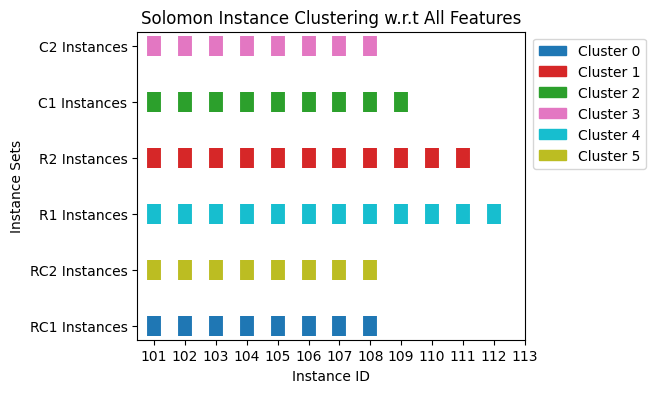

In [41]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Patch

plt.figure(figsize=(5,4))

labels = ["Cluster " + str(i) for i in range(n_clusters)]
colors = ["tab:blue","tab:red","tab:green","tab:pink","tab:cyan","tab:olive","tab:orange","yellow","black"]
colors = colors[0:n_clusters]
instance_sets = dict()
for index, row in df_results.iterrows():
    instance = row["instance"]
    prefix = instance.replace(instance[-4:],"")
    letter = prefix.replace(prefix[-3:],"")
    match letter:
        case "C":
            y = 3
        case "R":
            y = 2.5
        case "RC":
            y = 2
    x = int(prefix[-3:])
    if x > 200:
        x -= 100
        y += 0.25
    plt.scatter(x,y,marker="|",s=200,c=colors[row["label"]],linewidth=10)
    
# Add labels and title
plt.xlabel('Instance ID')
plt.ylabel('Instance Sets')

plt.yticks([2,2.25,2.5,2.75,3,3.25], ["RC1 Instances","RC2 Instances", "R1 Instances","R2 Instances", "C1 Instances","C2 Instances"])
plt.xticks([i for i in range(101,114)])

plt.title('Solomon Instance Clustering w.r.t All Features')

# Add a legend
legend_handles = [Circle(0,color=colors[i], label='Circle ' + str(i)) for i in range(len(colors))]

plt.legend(legend_handles, labels,bbox_to_anchor=(1.33,1))

# Display the plot
plt.show()


### Homberger Instance Clustering

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv('Homberger_features.csv')
print(df.shape)
df.head()

(300, 23)


,instance,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,average_distance_to_centroid,cv_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,...,tw_ratio_avg_overlaps_to_total,tw_ratio_avg_window_length_to_longest,tw_ratio_cv_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,C1_4_4.txt,400.0,0.0582,0.2806,0.1180,0.2744,0.1211,0.0899,0.2166,4.0,...,0.73,0.73,0.04,6,0.0950,0.045,0.0263,0.0007,0.0210,0.0392
1,C1_10_6.txt,1000.0,0.0381,0.2868,0.0523,0.2842,0.0529,0.0897,0.2218,4.0,...,0.11,0.37,0.12,7,0.0910,0.043,0.0110,0.0004,0.0096,0.0208
2,R1_4_8.txt,400.0,0.0141,0.2594,0.1318,0.2591,0.1319,0.0889,0.2338,4.0,...,0.69,0.69,0.07,2,0.2725,0.165,0.0092,0.0042,0.0136,0.0218
3,C2_10_7.txt,1000.0,0.0223,0.2407,0.0542,0.2390,0.0556,0.0274,0.0625,4.0,...,0.17,0.40,0.03,27,0.0170,0.126,0.0588,0.0006,0.0434,0.0614
4,C1_4_1.txt,400.0,0.0582,0.2806,0.1180,0.2744,0.1211,0.0899,0.2166,4.0,...,0.05,0.68,0.19,6,0.0950,0.045,0.0263,0.0007,0.0210,0.0392


In [3]:
#Normalizamos la data para facilitar el clustering de kmeans
scaler = MinMaxScaler(feature_range=(0, 1))
df_no_instance = df.drop(["instance"],axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_instance), columns=df_no_instance.columns)
df_scaled.columns

Index(['client_number', 'distance_centroid_depot', 'average_distance_to_depot',
       'cv_distance_to_depot', 'average_distance_to_centroid',
       'cv_distance_to_centroid', 'ratio_mean_client_demand_capacity',
       'ratio_cv_client_demand_capacity', 'average_clients_per_vehicle',
       'avg_NN_distances', 'cv_NN_distances', 'tw_ratio_max_overlaps_to_total',
       'tw_ratio_avg_overlaps_to_total',
       'tw_ratio_avg_window_length_to_longest',
       'tw_ratio_cv_window_length_to_longest', 'optimal_min_samples',
       'cluster_ratio', 'outlier_ratio', 'avg_clients_per_cluster',
       'cv_clients_per_cluster', 'intra_cluster_distance',
       'inter_cluster_distance'],
      dtype='object')

In [4]:
#Clustering solo con spatial features
#df_spatial = df_scaled[["distance_centroid_depot","average_distance_to_depot","cv_distance_to_depot","avg_NN_distances","cv_NN_distances"]]

#Demand features
#df_spatial = df_scaled[["ratio_mean_client_demand_capacity","ratio_cv_client_demand_capacity"]]

#Clustering features
#df_spatial = df_scaled[["cluster_ratio","outlier_ratio","avg_clients_per_cluster","cv_clients_per_cluster","intra_cluster_distance","inter_cluster_distance"]]

#Time Window features
#df_spatial = df_scaled[["tw_ratio_max_overlaps_to_total","tw_ratio_avg_overlaps_to_total","tw_ratio_avg_window_length_to_longest","tw_ratio_cv_window_length_to_longest"]]

#Spatial + Clustering features
#df_spatial = df_scaled[["client_number","distance_centroid_depot","average_distance_to_depot","cv_distance_to_depot","avg_NN_distances","cv_NN_distances","optimal_min_samples","cluster_ratio","outlier_ratio","avg_clients_per_cluster","cv_clients_per_cluster","intra_cluster_distance","inter_cluster_distance"]]

#All features
df_spatial = df_scaled.drop(["average_distance_to_centroid","cv_distance_to_centroid","tw_ratio_max_overlaps_to_total","tw_ratio_avg_overlaps_to_total","tw_ratio_avg_window_length_to_longest","tw_ratio_cv_window_length_to_longest"],axis=1)

df_spatial.head()

,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,avg_NN_distances,cv_NN_distances,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,0.25,1.000000,0.884758,0.379608,0.974394,0.829573,0.0,0.216814,0.451613,0.16,0.278175,0.060241,0.188989,0.046875,0.193590,0.356098
1,1.00,0.638489,1.000000,0.001152,0.971698,0.854537,0.0,0.000000,0.000000,0.20,0.264556,0.050602,0.063270,0.000000,0.047436,0.131707
2,0.25,0.206835,0.490706,0.459101,0.960916,0.912146,0.0,0.654867,0.354839,0.00,0.882533,0.638554,0.048480,0.593750,0.098718,0.143902
3,1.00,0.354317,0.143123,0.012097,0.132075,0.089774,0.0,0.132743,0.064516,1.00,0.012598,0.450602,0.456039,0.031250,0.480769,0.626829
4,0.25,1.000000,0.884758,0.379608,0.974394,0.829573,0.0,0.216814,0.451613,0.16,0.278175,0.060241,0.188989,0.046875,0.193590,0.356098


In [11]:
X = np.array(df_spatial)
n_clusters = 4
clustering = KMeans(n_clusters=n_clusters,n_init=1000).fit(X)
df_results = pd.concat([df["instance"],pd.DataFrame(clustering.labels_,columns=["label"]),df_spatial],axis=1)
print(df_results.shape)
df_results.head()

(300, 18)


,instance,label,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,avg_NN_distances,cv_NN_distances,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,C1_4_4.txt,0,0.25,1.000000,0.884758,0.379608,0.974394,0.829573,0.0,0.216814,0.451613,0.16,0.278175,0.060241,0.188989,0.046875,0.193590,0.356098
1,C1_10_6.txt,0,1.00,0.638489,1.000000,0.001152,0.971698,0.854537,0.0,0.000000,0.000000,0.20,0.264556,0.050602,0.063270,0.000000,0.047436,0.131707
2,R1_4_8.txt,1,0.25,0.206835,0.490706,0.459101,0.960916,0.912146,0.0,0.654867,0.354839,0.00,0.882533,0.638554,0.048480,0.593750,0.098718,0.143902
3,C2_10_7.txt,3,1.00,0.354317,0.143123,0.012097,0.132075,0.089774,0.0,0.132743,0.064516,1.00,0.012598,0.450602,0.456039,0.031250,0.480769,0.626829
4,C1_4_1.txt,0,0.25,1.000000,0.884758,0.379608,0.974394,0.829573,0.0,0.216814,0.451613,0.16,0.278175,0.060241,0.188989,0.046875,0.193590,0.356098


#### Clustering Validation Matrix

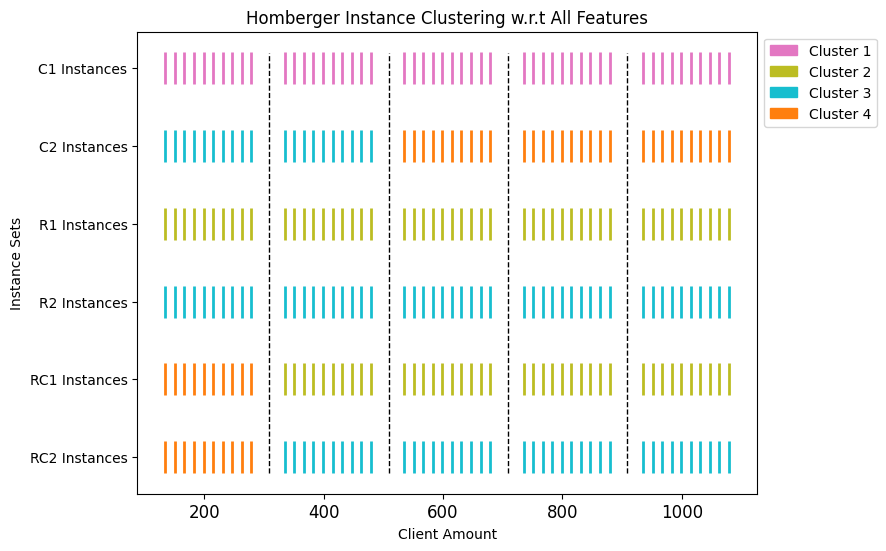

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Patch


plt.figure(figsize=(8,6))

labels = ["Cluster " + str(i+1) for i in range(n_clusters)]
colors = ["tab:pink","tab:olive","tab:cyan","tab:orange","tab:green","tab:red","tab:blue","yellow","black","tab:brown",
          "orange","blue","pink","cyan","green","lime","slategray","violet","hotpink","maroon","coral","peachpuff",
          "wheat","lightgreen","lightskyblue","indigo","peru","red","indianred","tomato"]
colors = colors[0:n_clusters]
instance_sets = dict()
for index, row in df_results.iterrows():
    instance = row["instance"]
    name = instance.replace(instance[-4:],"")
    name_parts = name.split("_")
    letter = name_parts[0][:-1]
    x = int(name_parts[0].replace(letter,""))*10000 + int(name_parts[1])*100 + int(name_parts[2])*16
    match letter:
        case "C":
            y = 3.25
        case "R":
            y = 2.75
        case "RC":
            y = 2.25
    if x > 20000:
        x -= 10000
        y -= 0.25
    plt.scatter(x,y,marker="|",s=500,c=colors[row["label"]],linewidths=2)

# Lineas para separar instance sets

lineX = 10390
for i in range(4):
    plt.plot([lineX + i*200,lineX + i*200],[1.95,3.3],color='black', marker='o', linestyle="--",linewidth=1, markersize=0)

plt.xlabel('Client Amount')
plt.ylabel('Instance Sets')

plt.yticks([2,2.25,2.5, 2.75,3, 3.25], ["RC2 Instances","RC1 Instances", "R2 Instances","R1 Instances", "C2 Instances","C1 Instances"])
plt.xticks([i+80 for i in range(10201,11010,200)],["200","400","600","800","1000"],fontsize=12)

plt.title('Homberger Instance Clustering w.r.t All Features')

legend_handles = [Circle(0,color=colors[i], label='Circle ' + str(i)) for i in range(len(colors))]

plt.legend(legend_handles, labels,bbox_to_anchor=(1,1))

plt.show()


In [415]:
pd.DataFrame(clustering.cluster_centers_,columns=df_spatial.columns)

,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,avg_NN_distances,cv_NN_distances,tw_ratio_max_overlaps_to_total,tw_ratio_avg_overlaps_to_total,tw_ratio_avg_window_length_to_longest,tw_ratio_cv_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,0.555556,0.193245,0.653036,0.251088,0.967505,0.928522,0.0,0.478859,0.286738,0.452083,0.325481,0.521645,0.281145,-1.110223e-16,0.916998,0.714645,0.030129,0.538194,0.058547,0.086043
1,0.477273,0.288587,0.589726,0.340752,0.025974,0.031380,0.0,0.513677,0.348974,0.443409,0.354182,0.521251,0.080441,-1.942890e-16,0.924660,0.712859,0.038545,0.589489,0.066667,0.093902
2,0.500000,0.582374,0.755019,0.308065,0.974394,0.842727,0.0,0.153097,0.277419,0.474000,0.337333,0.540000,0.204242,1.600000e-01,0.287913,0.030169,0.160723,0.028125,0.133077,0.268049
3,0.450000,0.485612,0.391078,0.365668,0.271968,0.243975,0.0,0.498230,0.490323,0.468500,0.329333,0.600779,0.106667,6.800000e-01,0.044331,0.514602,0.782416,0.103125,0.764872,0.817317


In [13]:
pd.DataFrame(clustering.cluster_centers_,columns=df_spatial.columns)

,client_number,distance_centroid_depot,average_distance_to_depot,cv_distance_to_depot,ratio_mean_client_demand_capacity,ratio_cv_client_demand_capacity,average_clients_per_vehicle,avg_NN_distances,cv_NN_distances,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,cv_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,0.500000,0.582374,0.755019,0.308065,0.974394,0.842727,0.0,0.153097,0.277419,1.600000e-01,0.287913,0.030169,0.160723,0.028125,0.133077,0.268049
1,0.555556,0.193245,0.653036,0.251088,0.967505,0.928522,0.0,0.478859,0.286738,-1.110223e-16,0.916998,0.714645,0.030129,0.538194,0.058547,0.086043
2,0.477273,0.288587,0.589726,0.340752,0.025974,0.031380,0.0,0.513677,0.348974,-1.942890e-16,0.924660,0.712859,0.038545,0.589489,0.066667,0.093902
3,0.450000,0.485612,0.391078,0.365668,0.271968,0.243975,0.0,0.498230,0.490323,6.800000e-01,0.044331,0.514602,0.782416,0.103125,0.764872,0.817317
